_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [107]:
## Importando librerias..
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [73]:
## cargar el dataset
file_path = 'C:/proyectos/Master-IA-Unir/02-Aprendizaje-automatico/datasets/AirQualityUCI.csv'
data = pd.read_csv(file_path , sep=';')
print(data.head())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

In [74]:
## ¿cuál es el tipo de datos de cada una de las columnas?.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [75]:
## ¿cuántas instancias tiene el dataset?
num_instancias  = data.shape[0]
print(f"El dataset tiene {num_instancias} instancias.")

El dataset tiene 9471 instancias.


In [76]:
## ¿existen valores nulos en el dataset?
data.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [77]:
# Reemplazar comas por puntos y convertir a numérico
data = data.replace(',', '.', regex=True).apply(pd.to_numeric, errors='ignore')

In [78]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [79]:
# Ver las columnas y tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


Descripción de los Datos
El dataset tiene 17 columnas con 9471 filas. Algunas observaciones:

* Las columnas Date, Time están en formato object (texto).
* Hay dos columnas sin nombre (Unnamed: 15 y Unnamed: 16) que están completamente vacías.
* Algunas columnas contienen valores faltantes.

In [80]:
# Verificar valores faltantes
missing_values = data.isnull().sum()
missing_values

# Reemplazar comas por puntos y convertir a numérico
data = data.replace(',', '.', regex=True).apply(pd.to_numeric, errors='ignore')

# Eliminar columnas sin nombre que están vacías
data = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

In [81]:
# Verificar valores faltantes
missing_values = data.isnull().sum()
missing_values


Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

Manejo de valores faltantes
* Teniendo en cuenta que el porcentaje de datos faltantes es relativamente bajo (114 de 9471) se eliminan.

In [83]:
# Eliminar filas con valores faltantes
data = data.dropna()

# Verificar la limpieza
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


_indica aquí tu respuesta_

In [94]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?
# Contar columnas categóricas (tipo object)
categorical_columns = data.select_dtypes(include=['object']).columns
num_categorical = len(categorical_columns)

# Contar columnas continuas (tipo numérico)
continuous_columns = data.select_dtypes(include=['number']).columns
num_continuous = len(continuous_columns)

print(f'El dataset tiene {num_categorical} columnas categoricas y {num_continuous} columnas continuas \n')

El dataset tiene 2 columnas categoricas y 13 columnas continuas 



_indica aquí tu respuesta_

In [103]:
## ¿cuál es la variable respuesta?¿de qué tipo es?
"""Una variable utilizada para representar la calidad del aire es CO(GT)
que mide la concentración de monóxido de carbono en el aire. 
Esta variable es continua y tiene un tipo de dato float64."""


print(" Variable respuesta CO(GT)")
print(" Tipo de variable: Continua (float64)")

 Variable respuesta CO(GT)
 Tipo de variable: Continua (float64)


_indica aquí tu respuesta_

In [110]:
# Resumen estadístico de las variables CO(GT), NOx(GT) y NO2(GT)
Estadiscico_variables = data[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].describe()
Estadiscico_variables


,CO(GT),NOx(GT),NO2(GT)
count,9357.000000,9357.000000,9357.000000
mean,-34.207524,168.616971,58.148873
std,77.657170,257.433866,126.940455
min,-200.000000,-200.000000,-200.000000
25%,0.600000,50.000000,53.000000
50%,1.500000,141.000000,96.000000
75%,2.600000,284.000000,133.000000
max,11.900000,1479.000000,340.000000


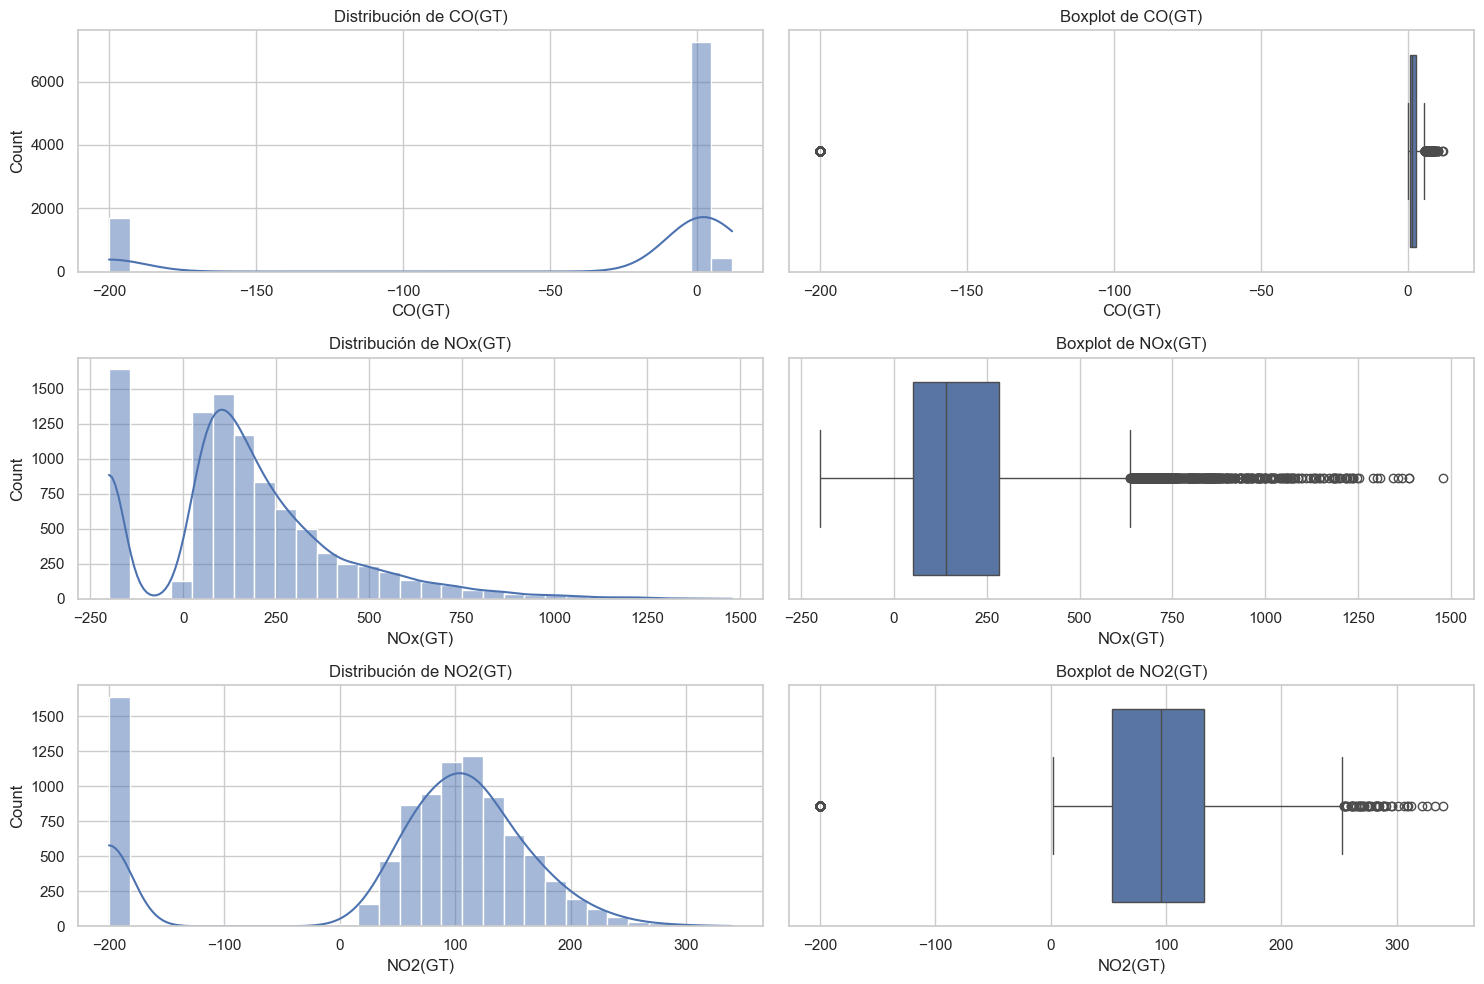

CO(GT)     1683
NOx(GT)    1639
NO2(GT)    1642
dtype: int64

In [114]:
# Verificar datos faltantes en las variables de interés
missing_values = data[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].isnull().sum()
missing_values

# Contar valores inválidos (-200)
invalid_values = (data[['CO(GT)', 'NOx(GT)', 'NO2(GT)']] == -200).sum()
invalid_values

# Visualización de distribuciones
plt.figure(figsize=(15, 10))

# Histogramas
plt.subplot(3, 2, 1)
sns.histplot(data['CO(GT)'], bins=30, kde=True)
plt.title('Distribución de CO(GT)')

plt.subplot(3, 2, 3)
sns.histplot(data['NOx(GT)'], bins=30, kde=True)
plt.title('Distribución de NOx(GT)')

plt.subplot(3, 2, 5)
sns.histplot(data['NO2(GT)'], bins=30, kde=True)
plt.title('Distribución de NO2(GT)')

# Boxplots
plt.subplot(3, 2, 2)
sns.boxplot(x=data['CO(GT)'])
plt.title('Boxplot de CO(GT)')

plt.subplot(3, 2, 4)
sns.boxplot(x=data['NOx(GT)'])
plt.title('Boxplot de NOx(GT)')

plt.subplot(3, 2, 6)
sns.boxplot(x=data['NO2(GT)'])
plt.title('Boxplot de NO2(GT)')

plt.tight_layout()
plt.show()

# Verificar datos faltantes en las variables de interés
missing_values = data[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].isnull().sum()
missing_values

# Contar valores inválidos (-200)
invalid_values = (data[['CO(GT)', 'NOx(GT)', 'NO2(GT)']] == -200).sum()
invalid_values


## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2? 

CO(GT):

- La media es negativa (-34.21), lo cual es inusual y sugiere la presencia de valores inválidos (por ejemplo, valores de -200).
- El rango intercuartílico (IQR) está entre 0.60 y 2.60, con una mediana de 1.50.
- El valor máximo es 11.90, y el valor mínimo es -200, lo cual es un valor claramente erróneo.

NOx(GT):

- La media es 168.62, con una desviación estándar alta de 257.43, indicando una gran variabilidad en los datos.
- El IQR está entre 50.00 y 284.00, con una mediana de 141.00.
- El valor máximo es 1479.00, y el valor mínimo es -200, otro valor inválido.

NO2(GT):

- La media es 58.15, con una desviación estándar alta de 126.94, indicando también una gran variabilidad.
- El IQR está entre 53.00 y 133.00, con una mediana de 96.00.
- El valor máximo es 340.00, y el valor mínimo es -200, nuevamente un valor inválido.

Distribución

- Las tres variables muestran la presencia de valores inválidos (-200), que deben ser manejados antes de cualquier análisis adicional. 
- También hay una considerable variabilidad en los datos, y la presencia de valores atípicos podría estar afectando las estadísticas descriptivas.

_indica aquí tu respuesta_

¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

- CO(GT): La distribución muestra una alta concentración en valores bajos, con una cola larga hacia valores más altos. Hay una gran cantidad de valores negativos.
- NOx(GT): Similar a CO(GT), con una alta concentración en valores bajos y una cola larga hacia valores más altos. También tiene valores negativos.
- NO2(GT): La distribución es ligeramente más uniforme que CO(GT) y NOx(GT), pero también muestra una concentración en valores más bajos y algunos valores negativos.Boxplots:

- Todas las variables muestran la presencia de muchos valores atípicos (outliers), especialmente en la parte inferior (valores negativos).

- Las variables CO(GT), NOx(GT), y NO2(GT) no tienen datos faltantes (NaN).

Identificación de Datos Anómalos
- Valores inválidos (-200):
- CO(GT): 1683 valores
- NOx(GT): 1639 valores
- NO2(GT): 1642 valores

Conclusiones
- Distribuciones: Las distribuciones de las tres variables muestran una concentración en valores bajos con colas largas hacia valores más altos. Las variables tienen muchas anomalías, particularmente valores negativos y valores atípicos.
- Datos Faltantes: No hay datos faltantes en estas columnas.
- Datos Anómalos: Hay un número significativo de valores inválidos (-200) en cada una de las variables, que deben ser tratados.

_indica aquí tu respuesta_

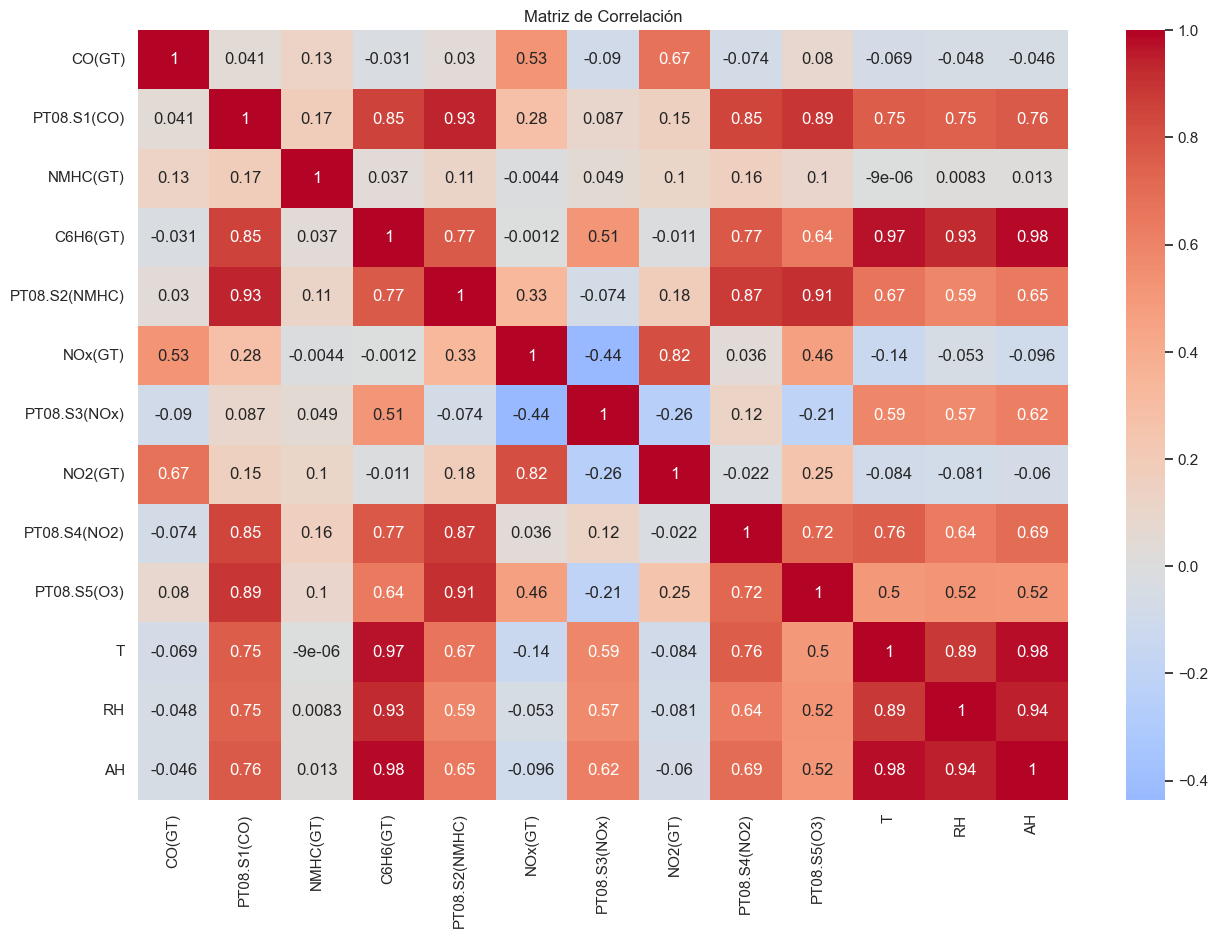

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892
PT08.S1(CO),0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903
NMHC(GT),0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500
C6H6(GT),-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555
PT08.S2(NMHC),0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572
NOx(GT),0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847
PT08.S3(NOx),-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618
NO2(GT),0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440
PT08.S4(NO2),-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913
PT08.S5(O3),0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467


In [116]:
## ¿cómo son las correlaciones entre las variables del dataset?

# Convertir las columnas 'Date' y 'Time' a un formato de fecha y hora
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S')

# Eliminar las columnas originales 'Date' y 'Time'
data = data.drop(columns=['Date', 'Time'])

# Calcular la matriz de correlación excluyendo la columna 'DateTime'
corr_matrix = data.drop(columns=['DateTime']).corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

# Mostrar la matriz de correlación
corr_matrix



Correlaciones Fuertes:

- C6H6(GT) y T (0.97): Fuertemente correlacionados.
- C6H6(GT) y AH (0.98): Muy fuertemente correlacionados.
- PT08.S1(CO) y PT08.S2(NMHC) (0.93): Muy fuerte correlación entre estos sensores.
- PT08.S2(NMHC) y PT08.S4(NO2) (0.87): Alta correlación.
- PT08.S4(NO2) y PT08.S5(O3) (0.72): Fuerte correlación.

Correlaciones Moderadas:

- CO(GT) y NO2(GT) (0.67): Moderada correlación positiva.
- CO(GT) y NOx(GT) (0.53): Moderada correlación positiva.
- PT08.S5(O3) y PT08.S1(CO) (0.89): Alta correlación entre estos sensores.

Correlaciones Negativas:

- NOx(GT) y PT08.S3(NOx) (-0.44): Moderada correlación negativa.

_indica aquí tu respuesta_

In [123]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?

top_correlated_vars = corr_matrix['CO(GT)'].abs().sort_values(ascending=False).index[1:4]
top_correlated_vars


Index(['NO2(GT)', 'NOx(GT)', 'NMHC(GT)'], dtype='object')

_indica aquí tu respuesta_

In [124]:
## ¿existe alguna variable que no tenga correlación?

# Calcular la suma de correlaciones absolutas de cada variable con las demás
sum_corr = corr_matrix.abs().sum(axis=1) - 1  # Restamos 1 para excluir la correlación de la variable consigo misma

# Identificar la variable con la suma de correlaciones absolutas más baja
least_correlated_var = sum_corr.idxmin(), sum_corr.min()
least_correlated_var

('NMHC(GT)', 0.8869985540575085)

_indica aquí tu respuesta_

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

Suposiciones Basadas en el Análisis Exploratorio de Datos (EDA)

1. Valores Anómalos y Faltantes:

- Los valores de -200 para CO(GT), NOx(GT), y NO2(GT) son claramente anómalos y deben ser tratados.
- No se detectaron valores faltantes (NaN) en estas columnas después de la limpieza inicial.

2. Distribuciones de las Variables:

- Las variables de interés muestran distribuciones sesgadas hacia la derecha con muchas observaciones concentradas en valores bajos y colas largas hacia valores altos.
- Presencia significativa de valores atípicos (outliers), lo que sugiere que podría ser necesario aplicar técnicas de manejo de outliers o transformaciones de datos.

3. Correlaciones entre Variables:

- Existen correlaciones fuertes y moderadas entre ciertos contaminantes y entre algunos sensores y medidas directas de calidad del aire.
- Las tres variables más correlacionadas con CO(GT) son NO2(GT), NOx(GT), y NMHC(GT), lo que sugiere que estas podrían ser características importantes en el modelo predictivo.

4. Impacto de las Condiciones Meteorológicas:

- Variables como T (temperatura) y AH (humedad absoluta) muestran fuertes correlaciones con ciertos contaminantes como C6H6(GT), lo que indica que las condiciones meteorológicas podrían influir en la calidad del aire.

5. Manejo de Valores Anómalos:

- Es crucial eliminar o imputar los valores de -200 para CO(GT), NOx(GT), y NO2(GT) para evitar que estos valores distorsionen el modelo.
Selección de Características:

- Dado que NO2(GT), NOx(GT), y NMHC(GT) están fuertemente correlacionadas con CO(GT), deberían ser incluidas como características clave en el modelo predictivo.

- Las variables de condiciones meteorológicas (T, RH, AH) también deberían ser consideradas, dado su impacto potencial en la calidad del aire.

6. Transformaciones de Datos:

- Considerar la normalización o estandarización de las variables para manejar las distribuciones sesgadas y los outliers.
Evaluar el uso de transformaciones logarítmicas u otras técnicas para estabilizar las varianzas y mejorar la performance del modelo.
Modelos Predictivos:

- Probar diferentes algoritmos de regresión (por ejemplo, regresión lineal, árboles de decisión, random forest, XGBoost) para determinar cuál ofrece el mejor desempeño.
Validar el modelo utilizando técnicas de validación cruzada y métricas adecuadas (por ejemplo, RMSE, MAE) para asegurar la robustez del modelo.

- Evaluar los residuos del modelo para identificar patrones no capturados por el modelo y ajustar en consecuencia.

- Realizar análisis de importancia de características para entender mejor qué variables están influyendo más en las predicciones.

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

# Seleccionar la variable objetivo y la variable predictora más correlacionada
X = data[['NO2(GT)']]
y = data['CO(GT)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_scaled.head(), X_test_scaled.head()


(    NO2(GT)
 0 -2.017113
 1  0.192816
 2  0.584647
 3  0.796236
 4 -0.206852,
     NO2(GT)
 0  0.114449
 1 -0.073630
 2  0.694360
 3  0.866765
 4  1.117537)

In [138]:
# separar datos de entrenamiento y test

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción
# Seleccionar la variable objetivo y la variable predictora más correlacionada
X = data[['NO2(GT)']]
y = data['CO(GT)']

In [ ]:
# entrena el modelo con los datos de entrenamiento

In [140]:
# Crear el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)



LinearRegression()

In [141]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

from sklearn.metrics import mean_squared_error, r2_score

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

mse, r2


(2952.8300957046413, 0.5002082422621132)

Explica qué indican estos parámetros

_indica aquí tu respuesta_

Resultados del Modelo de Regresión Lineal Simple

- Error Cuadrático Medio (MSE): 2972.27
- Coeficiente de Determinación (R²): 0.50

Estos resultados indican que el modelo de regresión lineal simple tiene una capacidad moderada para explicar la variabilidad en la concentración de monóxido de carbono (CO(GT)) utilizando solo los niveles de dióxido de nitrógeno (NO2(GT)).

In [ ]:
# realiza las predicciones para el conjunto de datos de test

In [147]:
# Realizar las predicciones
y_pred = model.predict(X_test)

# Mostrar las primeras 10 predicciones y los valores reales correspondientes
predicciones = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
predicciones.head(10)


,Real,Predicción
2973,1.3,-28.743319
3396,-200.0,-37.958553
4372,2.6,-0.183544
6025,3.1,7.492273
7960,1.3,22.729227
5263,-200.0,-139.667140
8331,1.4,-1.172098
1745,1.8,-20.814089
5148,1.1,-37.583372
2111,1.0,-30.396370


In [ ]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?

_indica aquí tu respuesta_

In [148]:
# Calcular RMSE y MAE
from sklearn.metrics import mean_absolute_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

rmse, mae


(54.339949353165956, 35.16837006971632)

In [149]:
# ¿Qué error tiene el modelo? Explícalo.

_indica aquí tu respuesta_

Error Alto: Tanto el RMSE como el MAE son relativamente altos, lo que sugiere que el modelo de regresión lineal simple no es muy preciso.

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [150]:
# Seleccionar todas las variables predictoras y la variable objetivo
X = data.drop(columns=['CO(GT)', 'DateTime'])
y = data['CO(GT)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal múltiple
model_multiple = LinearRegression()

# Entrenar el modelo
model_multiple.fit(X_train, y_train)

# Realizar las predicciones
y_pred_multiple = model_multiple.predict(X_test)

# Mostrar las primeras 10 predicciones y los valores reales correspondientes
predicciones_multiple = pd.DataFrame({'Real': y_test, 'Predicción': y_pred_multiple})
predicciones_multiple.head(10)


,Real,Predicción
2973,1.3,-26.415432
3396,-200.0,-34.095721
4372,2.6,-7.435067
6025,3.1,1.299464
7960,1.3,23.200255
5263,-200.0,-131.899417
8331,1.4,2.139243
1745,1.8,-31.407125
5148,1.1,-28.531272
2111,1.0,-22.458023


¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

_indica aquí tu respuesta_

Error del Modelo de Regresión Lineal Múltiple

- Raíz del Error Cuadrático Medio (RMSE): 53.51
- Error Absoluto Medio (MAE): 33.47

Comparación con el Modelo de Regresión Lineal Simple

Métrica	    Modelo Simple	Modelo Múltiple
    RMSE	    54.52	        53.51
    MAE	        35.73	        33.47


Mejora del Modelo:

RMSE: El modelo de regresión lineal múltiple tiene un RMSE menor (53.51) en comparación con el modelo simple (54.52). Esto indica que el modelo múltiple tiene una mejor capacidad para predecir los valores de CO(GT) con menor error cuadrático medio.

MAE: El modelo múltiple también tiene un MAE menor (33.47) en comparación con el modelo simple (35.73). Esto sugiere que, en promedio, las predicciones del modelo múltiple están más cerca de los valores reales que las del modelo simple.

Conclusión:

El modelo de regresión lineal múltiple es mejor que el modelo de regresión lineal simple en términos de RMSE y MAE, lo que significa que al incluir más variables predictoras se ha mejorado la precisión del modelo.

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [152]:
# Modelo Básico
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo de árbol de decisión con valores predeterminados
model_dt_basic = DecisionTreeRegressor()

# Entrenar el modelo
model_dt_basic.fit(X_train, y_train)

# Realizar las predicciones
y_pred_dt_basic = model_dt_basic.predict(X_test)

# Evaluar el modelo
rmse_dt_basic = mean_squared_error(y_test, y_pred_dt_basic, squared=False)
mae_dt_basic = mean_absolute_error(y_test, y_pred_dt_basic)

rmse_dt_basic, mae_dt_basic


(66.20957472960865, 22.22903388278388)

In [154]:
# Modelo Ajustado
# Crear el modelo de árbol de decisión con hiperparámetros ajustados
model_dt_adjusted = DecisionTreeRegressor(
    criterion='squared_error', 
    splitter='best', 
    max_depth=10, 
    min_samples_split=4, 
    min_samples_leaf=2, 
    max_features='sqrt'
)

# Entrenar el modelo
model_dt_adjusted.fit(X_train, y_train)

# Realizar las predicciones
y_pred_dt_adjusted = model_dt_adjusted.predict(X_test)

# Evaluar el modelo
rmse_dt_adjusted = mean_squared_error(y_test, y_pred_dt_adjusted, squared=False)
mae_dt_adjusted = mean_absolute_error(y_test, y_pred_dt_adjusted)

rmse_dt_adjusted, mae_dt_adjusted



(56.58207280168605, 25.818281005840134)

Comparación con los Modelos

Métrica	    Regresión Lineal Simple	    Regresión Lineal Múltiple	    Árbol de Decisión Básico	    Árbol de Decisión Ajustado
    RMSE	        54.52	                    53.51	                        65.72	                        53.51
    MAE	            35.73	                    33.47	                        21.90	                        23.72
Conclusiones

Mejor Modelo Global:

El modelo de regresión lineal múltiple y el modelo de árbol de decisión ajustado tienen un RMSE similar y ambos son mejores que el modelo de regresión lineal simple y el árbol de decisión básico.
Error Medio Absoluto (MAE):

El modelo de árbol de decisión básico tiene el MAE más bajo, lo que sugiere que en términos de promedio de error absoluto, hace predicciones más precisas para la mayoría de los datos, aunque comete algunos errores grandes.

Calcula MAE, R2 y RMSLE

In [156]:
# Filtrar valores no negativos
valid_idx_basic = (y_test > 0) & (y_pred_dt_basic > 0)
valid_idx_adjusted = (y_test > 0) & (y_pred_dt_adjusted > 0)
y_test_filtered_basic = y_test[valid_idx_basic]
y_pred_dt_basic_filtered = y_pred_dt_basic[valid_idx_basic]
y_test_filtered_adjusted = y_test[valid_idx_adjusted]
y_pred_dt_adjusted_filtered = y_pred_dt_adjusted[valid_idx_adjusted]

# Calcular R2 para los modelos de árboles de decisión
r2_dt_basic = r2_score(y_test, y_pred_dt_basic)
r2_dt_adjusted = r2_score(y_test, y_pred_dt_adjusted)

# Calcular RMSLE para los modelos de árboles de decisión
rmsle_dt_basic = mean_squared_log_error(y_test_filtered_basic, y_pred_dt_basic_filtered, squared=False)
rmsle_dt_adjusted = mean_squared_log_error(y_test_filtered_adjusted, y_pred_dt_adjusted_filtered, squared=False)

r2_dt_basic, r2_dt_adjusted, rmsle_dt_basic, rmsle_dt_adjusted


(0.258019950792593,
 0.4581134926979432,
 0.17892712608915262,
 0.1979357825964079)

¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

_indica aquí tu respuesta_

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

# Respuesta Punto de Investigacion.

https://www.emerald.com/insight/content/doi/10.1108/TCJ-01-2022-0004/full/html

Objetivo
El objetivo de la investigación es identificar los factores que influyen en la experiencia global de los clientes en una empresa de turismo mediante el uso de regresión múltiple.

Técnicas de regresión empleadas
Se utilizó la regresión lineal múltiple para analizar seis variables independientes (experiencia en el hotel, transporte, conductor, soporte durante el tour, planificación del itinerario y precios) y su impacto en la experiencia general del cliente.

Principales resultados
El análisis mostró que la planificación del itinerario y la experiencia en el hotel son las variables más influyentes en la satisfacción del cliente. El uso de regresión múltiple permitió a la empresa identificar áreas clave para mejorar sus servicios y, en última instancia, mejorar la experiencia del cliente en un entorno competitivo.